# Physics 280: Problem Set 1
### By Oliver Priebe in Collaboration with Erika Gustafson
##### 9/8/18

### 1) Modeling HIV

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
filepath = '/Users/me/Projects/Python/PHYS280/Datasets/01HIVseries/HIVseries.csv'
HIVdata = np.loadtxt(filepath, delimiter=',')

In [3]:
xvals = HIVdata[:,0]
rawYvals = HIVdata[:,1]
log_transformedy = np.log(HIVdata[:,1])

Now a quick peek at the data

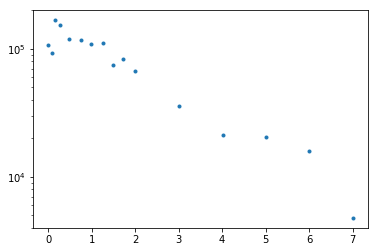

In [111]:
plt.semilogy(xvals, rawYvals, '.')

### Defining our model:
viral_load = $A \times e ^{-alpha * time} + B \times e^{-beta * time}$

With <br>
alpha = clearance rate of virons<br>
beta = clearance rate of Infected T cells<br>
A = Viral Load at t =0 <br>
B = Number of infected T cells at t = 0 $\times$ Number of virons produced per T cell <br><br>


**Note**: We will make assumption that the rate of clearance of virons is greater than the rate of clearance of infected T cells such that $beta < alpha$. This means that the end behavior is caused more by the second term, since the larger alpha will cause the first term to decay faster. We can therefore use the log transformed linear behavior of our dataset to find beta and B.

Since $V(t)$ at late time points is $\approx B \times e^{-beta * time}$ we can take the log of both sides to get<br>
$log(V) = log(B) - beta \times t \times log(e)$ <br> and since $log(e) = 1$<br><br>
$log(V) = log(B) - beta \times t$ <br>

with this we can now use the slope after timepoint 10 as a charecterization of end behavior to find B and beta.

In [108]:
beta = -((log_transformedy[15] - log_transformedy[11]) / (HIVdata[15,0] - HIVdata[11,0]))
beta

0.5001399310278336

We can then extrapolate to find the y-intercept, which would be B

In [25]:
timeToPointEleven = HIVdata[11,0]

In [59]:
lgB = log_transformedy[11] + (beta * timeToPointEleven)

In [109]:
B = np.e ** lgB
B

158841.639881087

We now have beta = 0.5001 and B = 158841.63 <br>
And we can double check our result by plotting our second term and eyballing the fit to the end behavior

In [63]:
xtest = np.linspace(0, 7, 100)
ytest = B * np.e ** (-beta * xtest)

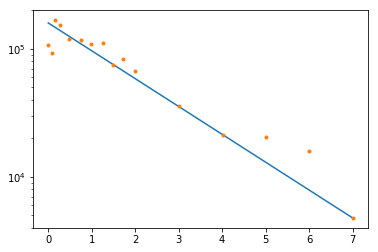

In [64]:
fig = plt.figure()
plt.semilogy(xtest, ytest, figure = fig)
plt.semilogy(xvals, rawYvals, '.', figure =fig)

looks *pretty good* <br><br>
We can now use the fact that at $V(0) = A + B$ to find A by using our raw timepoint 0 as our $V(0)$

In [128]:
A = HIVdata[0,1] - B
A

-52741.639881087

Now lets take stock of our knowlege of our parameters:
We found that $beta = 0.5$ and $B = 158841.64$ using the end behavior of our data, with the assumption that $alpha > beta$ <br>
We then used the fact that $V(0) = A + B$ to find that $A = -52741.64$ <br><br>
Now that we have gotten down to one parameter, we can determine alpha by trying to fit our model to the graph. 

In [114]:
time = np.linspace(0, 7, 100000)

In [124]:
#quick and dirty function to test values for last param
def fitTest(alph) :
    alpha = alph
    viral_load = A * np.exp(-alpha * time) + B * np.exp(-beta * time)
    fitting = plt.figure()
    plt.plot(xvals, rawYvals, '.', figure = fitting)
    plt.plot(time, viral_load, figure = fitting)
    plt.xlabel('time [days]')
    plt.ylabel('viral load [RNA/mL]')

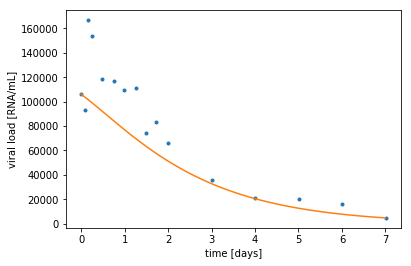

In [129]:
fitTest(1)

$alpha = 1$ doesnt look too promising

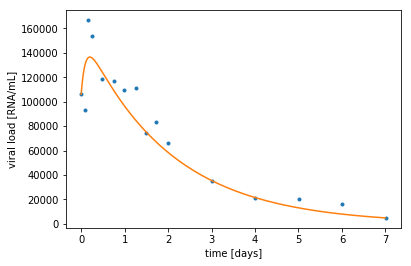

In [130]:
fitTest(10)

$alpha = 10$ look a bit better, however it misses the peak of the spike

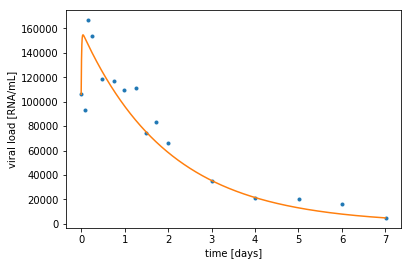

In [136]:
fitTest(100)

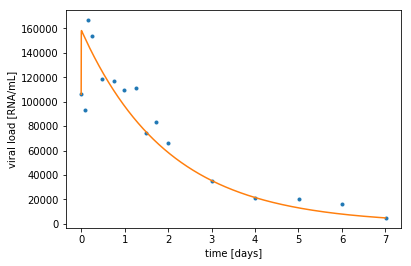

In [138]:
fitTest(1000)

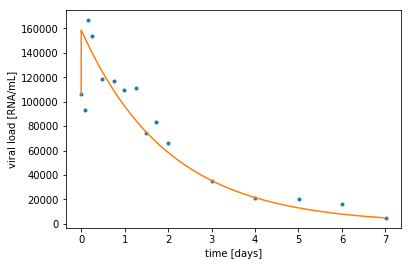

In [139]:
fitTest(5000)

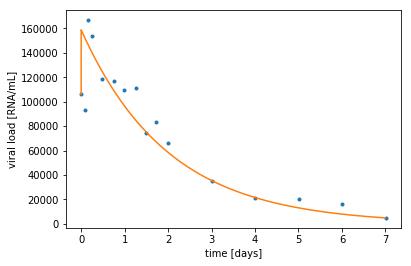

In [142]:
fitTest(50000)

It appears that there is no change in the curve after a threshold alpha value of about 1000. This is likely becuase the functions with alpha above 1000 have the first term decaying at a rate that is too rapid to be captured at this resolution. We will thus settle with alpha = 1000???

#### c. 
The inverse of the T-Cell infection rate is given by $beta ^{-1}$ which is $\approx 2 Days$ This is quite small in comparision to the latency period of HIV, which is about 10 years, or equivalently, 3650 days.

In [145]:
bInv = beta ** -1
bInv

1.9994404324903792

## 2) Bacterial Example

The two families of functions used by Norvik and Weiner in studying productino of beta galactosidase were <br>
$V(t) = 1 - e ^{-t/tau}$ and $W(t) = A(e^{-t/r} - 1 + \frac{t}{tau})$